# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [27]:
# Explore and prepare the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [3]:
df['temperature'].mean()

98.24923076923078

In [4]:
df.tail()

,temperature,gender,heart_rate
125,96.3,M,70.0
126,97.7,M,77.0
127,98.2,F,73.0
128,97.9,M,72.0
129,98.7,F,59.0


In [5]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [7]:
# Is there any null value?
df.isnull().sum()

temperature    0
gender         0
heart_rate     0
dtype: int64

# Q1: Is the distribution of body temperatures normal?

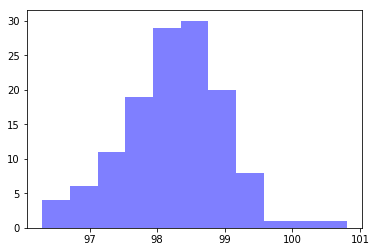

In [8]:
# Choose the number of bins to be the square root of the number of samples.
bins = int(np.sqrt(len(df)))

# plot histogram and check if you see normal distribution of data
plt.hist(df.temperature, bins, facecolor='blue', alpha=0.5)
plt.show()

It appears that the temperature data is normally distributed. Confirm this with ECDF.

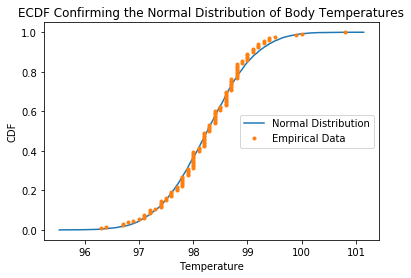

In [9]:
# First define a function to compute the CDF:

def cdf(data):
    # Number of data points:
    n = len(data)

    # x-data for the CDF:
    x = np.sort(data)

    # y-data for the CDF:
    y = np.arange(1, n+1) / n

    return x, y

# Compute data to summarize CDF distribution
n = len(df.temperature)
M = np.mean(df.temperature)
s = np.std(df.temperature)

# Make the random numbers predictable using random.seed
np.random.seed(15)

# Simulate a random normal distribution sample with above mean and std and size of 10,000:
normal = np.random.normal(M, s, 10000)

# Now compute the data required to plot ECDF
x_temp, y_temp = cdf(df.temperature)
x_norm, y_norm = cdf(normal)

# Plot both CDFs on the same plot:
plt.plot(x_norm, y_norm)
plt.plot(x_temp, y_temp, marker='.', linestyle='none')

# Add labels, legend, then show the plot
plt.xlabel('Temperature')
plt.ylabel('CDF')
plt.legend(('Normal Distribution', 'Empirical Data'), loc='center right')
plt.title('ECDF Confirming the Normal Distribution of Body Temperatures')
plt.show()

Above chart shows that the temperature data is normally distributed

# Q2: Is the sample size large? Are the observations independent?

In [10]:
# Sample sizes equal to or greater than 30 are considered sufficient for the CLT to hold.
print(len(df))

130


Sample size is greater than 30. So, the sample size is large. The observations are independent; each temperature data is measured from different patient. 

# Q3: Is the true population mean really 98.6 degrees F?

In this situation, is it appropriate to use the  𝑡  or  𝑧  statistic?
Now try using the other test. How is the result be different? Why?

In [12]:
# mean of temperature in the data given
mean = np.mean(df.temperature)
print(mean)


98.24923076923078


Set of temperature data is used to test against population mean. So, it's better to use one-sample test. 

Null hypothesis is "True Population Mean is 98.6 F". Let's see if null hypothesis holds true. To prove or disprove null hypothesis, calculate t test, p value and t-distribution and see if t-statistic falls outside the t-distribution.

In [14]:
# The t test compares two averages (means) and tells you if they are different from each other. 
# The t test also tells you how significant the differences are. 
# In other words it lets you know if those differences could have happened by chance. 

# Let's try the t test and corresponding p-value (probability that the results from sample data occurred by chance)
# sicpy has built-in function to get t-statistic and p-value
t = stats.ttest_1samp(df.temperature, 98.6)[0]
p = stats.ttest_1samp(df.temperature, 98.6)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: -5.4548232923645195
p-value: 2.4106320415561276e-07


In [15]:
# use Percent point function from stats package to compute the t-distribution corresponding to
# confidence level and degrees of freedom:
print((stats.t.ppf(q=0.0005, df=n-1)), (stats.t.ppf(q=0.9995, df=n-1)))

-3.3675464541818454 3.367546454181878


The t-statistic falls outside the t-distribution corresponding to a 99.9% confidence level. Also, p-value is less than 0.05. So, null hypothesis is rejected. "True population mean is not really 98.6 degress F".

Now, let's try z-statistics for the given data

In [22]:
# standard error of the mean:
sem = (np.std(df.temperature))/np.sqrt(n)

# z-score - compare given temperature mean and 98.6 which is questionable mean temperature
z = (mean - 98.6) / sem

print(z)

-5.475925202078116


z-score tells us "Given a data point, how many standard deviations is it away from the mean?". The value -5.476 is closer to t-statistic computed and give us a reason to reject null hypothesis. So, true mean temperature can't be 98.6 degree F

# Q4. Draw a small sample of size 10 from the data and repeat both frequentist tests.

Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  𝑡  and  𝑧  statistic?


In [21]:
# First, seed the random number generator:
np.random.seed(15)

# Draw a small sample of size 10 from the data
sample = np.random.choice(df.temperature, size=10)

# Run t-test on the sample:
t = stats.ttest_1samp(sample, 98.6)[0]
p = stats.ttest_1samp(sample, 98.6)[1]

print('t-statistic:', t)
print('p-value:', p)

t-statistic: -2.6882644585784705
p-value: 0.024867110651187487


In [26]:
# Now, calculate z-score
# standard error of the mean:
sem = (np.std(sample))/np.sqrt(len(sample))

# z-score - compare given temperature mean and 98.6 which is questionable mean temperature
z = (np.mean(sample) - 98.6) / sem

print(z)


-2.833679547329114


The above values for t-statistic, p-value and z-score also prove that we can reject the null hypothesis. The difference in these values are due to nature of data distribution. Because, we took smaller set of data, the stats are different.

# Q5. At what temperature should we consider someone's temperature to be "abnormal"?

As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

In [34]:
# copying the computation earlier, to keep it handy for reference
n = len(df.temperature)
M = np.mean(df.temperature)
s = np.std(df.temperature)

In [28]:
# “Critical" values of z are associated with interesting central areas under the standard normal curve. 
# Calculate the critical value of z at 99.95% confidence interval
z_critical = norm.ppf(0.9995)
z_critical

3.2905267314919255

In [31]:
# margin of error is standard error mean * critical value of z
sem = (np.std(df.temperature))/np.sqrt(n)
moe = z_critical * sem
print('Margin of Error:', moe)

Margin of Error: 0.21078000298341226


The 95% confidence interval for a single draw from a normal distribution with mean mu and std deviation sigma is

stats.norm.interval(0.95, loc=mu, scale=sigma)

In [35]:
# Calculate 95% confidence interval:
CI = stats.norm.interval(0.95, loc=M, scale=s)
print('95% Confidence Interval:', CI)

95% Confidence Interval: (96.81775582674824, 99.68070571171332)


Based on the above calculations, temperatures above 99.68 or below 96.82 can be considered as "abnormal temperature"

# Q6. Is there a significant difference between males and females in normal temperature?

What testing approach did you use and why?

The permutation test (type of statistical significance test in which the distribution of the test statistic under the null hypothesis is obtained by calculating all possible values of the test statistic under rearrangements of the labels on the observed data points) is the best approach to test null hypothesis. 

In [37]:
# Filter temperatures by gender:
female_temperature = df.temperature[df.gender == 'F']
male_temperature = df.temperature[df.gender == 'M']

# Sample Sizes:
n_female = len(female_temperature)
n_male = len(male_temperature)

# Sample Means:
M_female = np.mean(female_temperature)
M_male = np.mean(male_temperature)

print('Female Sample Size:', n_female, '; Mean Temperature:', M_female)
print('\nMale Sample Size:', n_male, '; Mean temperature:', M_male)

Female Sample Size: 65 ; Mean Temperature: 98.39384615384613

Male Sample Size: 65 ; Mean temperature: 98.1046153846154


There is some difference between male and female in terms of mean. But, not a significant difference. To make sure, run permutation test

In [46]:
def permutation_sample(data1, data2):

    # Concatenate the data sets:
    data = np.concatenate((data1, data2))

    permutated_data = np.random.permutation(data)
    permutation_sample_1 = permutated_data[:len(data1)]
    permutation_sample_2 = permutated_data[len(data1):]

    return permutation_sample_1, permutation_sample_2


def draw_permutation_replicates(data_1, data_2, func, size=1):

    # Initialize
    permutation_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation samples:
        permutation_sample_1, permutation_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic:
        permutation_replicates[i] = func(permutation_sample_1, permutation_sample_2)

    return permutation_replicates

def difference_of_means(data_1, data_2):
    return np.mean(data_1) - np.mean(data_2)

In [51]:
# Again, seed the random number generator for this calculation
np.random.seed(15)

# Compute difference of means:
mean_difference = difference_of_means(female_temperature, male_temperature)

# Draw 10,000 permutation replicates:
permutation_replicates = draw_permutation_replicates(female_temperature, male_temperature, difference_of_means, size=10000)

# Compute fraction of replicates that are greater than the observed difference of means:
p = np.sum(permutation_replicates >= mean_difference) / len(permutation_replicates)

# Print the results:
print('Difference of Means', mean_difference)
print('p-value =', p)

Difference of Means 0.289230769230727
p-value = 0.013


Above calculations and p-value shows that only around 1.3% of the time there is "some difference" (about 0.29) between female temperature and male temperature. This proves that there is no significant difference between female and male temperatures. 

Summary:

It's proven that mean body temperature is not 98.6 degree F. It's also proven that distribution of body temperatures is normal distribution and temperature above 99.68 (or below 96.82) could be considered as abnormal temperature. Also, there is no significant difference between female and male temperatures.